## Preprocessing

In [40]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME', 'CLASSIFICATION'])

In [3]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [45]:
# Look at the number of successful vs unsuccessful applications
application_df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_value_counts = application_df.APPLICATION_TYPE.value_counts()
app_value_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = app_value_counts[app_value_counts < 500].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
#class_value_counts = application_df.CLASSIFICATION.value_counts()
#class_value_counts

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#print(class_value_counts[class_value_counts > 1])

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#classifications_to_replace = class_value_counts[class_value_counts < 100].index.tolist()

# Replace in dataframe
#for cls in classifications_to_replace:
#    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
#application_df['CLASSIFICATION'].value_counts()

In [9]:
# Check STATUS counts
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [46]:
#Since there are only 5 rows of status = 0, lets remove those and the column so they don't affect the model
application_df = application_df[application_df['STATUS'] != 0]

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['STATUS'])

In [11]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:

# Scale numeric data column "ASK_AMT"
# Create an instance of StandardScaler
scaler = StandardScaler()

# Reshape the column data to a 2D array
ask_amt = application_df['ASK_AMT'].values.reshape(-1, 1)

# Fit the scaler on the column data
scaler.fit(ask_amt)

# Transform the column data
application_df['ASK_AMT'] = scaler.transform(ask_amt)
application_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,-0.031728,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,-0.030539,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,-0.031728,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,-0.031708,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,-0.030149,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
X.shape

(34294, 37)

## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
## implement a sequential model for keras - go from input layer - 2 inputs (x / attribute 1 and y / attribute 2 ) - > node layer (or layers) - > output (1 node)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(input_dim=37, units=80, activation='relu')
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(input_dim=80, units=30, activation='relu')
)

# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3040      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5501 (21.49 KB)
Trainable params: 5501 (21.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
fitModel = nn.fit(X_train, y_train, epochs=175)

Epoch 1/175
804/804 [==============================] - 0s 403us/step - loss: 0.5836 - accuracy: 0.7185
Epoch 2/175
804/804 [==============================] - 0s 396us/step - loss: 0.5723 - accuracy: 0.7238
Epoch 3/175
804/804 [==============================] - 0s 391us/step - loss: 0.5701 - accuracy: 0.7230
Epoch 4/175
804/804 [==============================] - 0s 392us/step - loss: 0.5689 - accuracy: 0.7258
Epoch 5/175
804/804 [==============================] - 0s 390us/step - loss: 0.5687 - accuracy: 0.7254
Epoch 6/175
804/804 [==============================] - 0s 389us/step - loss: 0.5690 - accuracy: 0.7253
Epoch 7/175
804/804 [==============================] - 0s 389us/step - loss: 0.5685 - accuracy: 0.7267
Epoch 8/175
804/804 [==============================] - 0s 391us/step - loss: 0.5670 - accuracy: 0.7260
Epoch 9/175
804/804 [==============================] - 0s 390us/step - loss: 0.5669 - accuracy: 0.7252
Epoch 10/175
804/804 [==============================] - 0s 392us/step - l

804/804 [==============================] - 0s 390us/step - loss: 0.5609 - accuracy: 0.7290
Epoch 80/175
804/804 [==============================] - 0s 387us/step - loss: 0.5607 - accuracy: 0.7297
Epoch 81/175
804/804 [==============================] - 0s 387us/step - loss: 0.5607 - accuracy: 0.7286
Epoch 82/175
804/804 [==============================] - 0s 387us/step - loss: 0.5603 - accuracy: 0.7292
Epoch 83/175
804/804 [==============================] - 0s 388us/step - loss: 0.5606 - accuracy: 0.7294
Epoch 84/175
804/804 [==============================] - 0s 385us/step - loss: 0.5603 - accuracy: 0.7295
Epoch 85/175
804/804 [==============================] - 0s 389us/step - loss: 0.5606 - accuracy: 0.7288
Epoch 86/175
804/804 [==============================] - 0s 388us/step - loss: 0.5602 - accuracy: 0.7291
Epoch 87/175
804/804 [==============================] - 0s 389us/step - loss: 0.5604 - accuracy: 0.7303
Epoch 88/175
804/804 [==============================] - 0s 386us/step - loss:

804/804 [==============================] - 0s 393us/step - loss: 0.5586 - accuracy: 0.7302
Epoch 158/175
804/804 [==============================] - 0s 393us/step - loss: 0.5585 - accuracy: 0.7304
Epoch 159/175
804/804 [==============================] - 0s 394us/step - loss: 0.5586 - accuracy: 0.7297
Epoch 160/175
804/804 [==============================] - 0s 389us/step - loss: 0.5583 - accuracy: 0.7295
Epoch 161/175
804/804 [==============================] - 0s 392us/step - loss: 0.5597 - accuracy: 0.7297
Epoch 162/175
804/804 [==============================] - 0s 390us/step - loss: 0.5583 - accuracy: 0.7306
Epoch 163/175
804/804 [==============================] - 0s 402us/step - loss: 0.5585 - accuracy: 0.7301
Epoch 164/175
804/804 [==============================] - 0s 392us/step - loss: 0.5584 - accuracy: 0.7296
Epoch 165/175
804/804 [==============================] - 0s 389us/step - loss: 0.5585 - accuracy: 0.7300
Epoch 166/175
804/804 [==============================] - 0s 387us/ste

In [49]:
# make a dataframe with the .history attribute
trainingSuccessDF = pd.DataFrame(fitModel.history)

trainingSuccessDF.tail()

,loss,accuracy
170,0.558697,0.730132
171,0.558024,0.730482
172,0.558166,0.729082
173,0.558136,0.729821
174,0.558162,0.730832


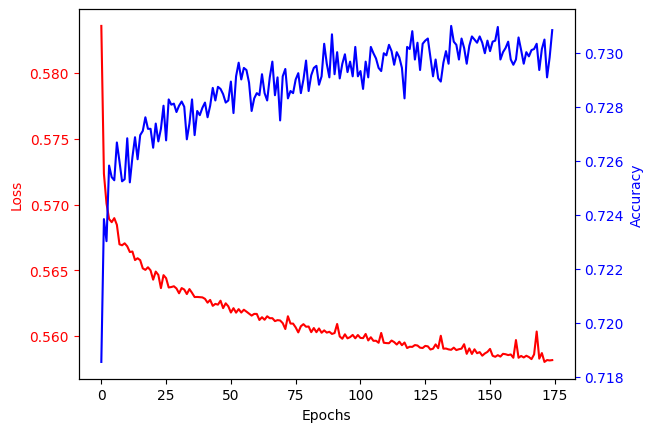

In [44]:
#plot the loss and accuracy for the TRAINING DATA
# Plotting the loss
fig, ax1 = plt.subplots()
ax1.plot(trainingSuccessDF['loss'], color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
ax1.tick_params(axis='y', colors='red')

# Creating a twin axis for accuracy
ax2 = ax1.twinx()
ax2.plot(trainingSuccessDF['accuracy'], color='blue')
ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', colors='blue')

# Display the plot
plt.show()

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 11.7491 - accuracy: 0.6688 - 121ms/epoch - 452us/step
Loss: 11.749070167541504, Accuracy: 0.6687660217285156


## Try Linear Activations

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
## implement a sequential model for keras - go from input layer - 2 inputs (x / attribute 1 and y / attribute 2 ) - > node layer (or layers) - > output (1 node)

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(input_dim=37, units=80, activation='sigmoid')
)

# Second hidden layer
nn2.add(
    tf.keras.layers.Dense(input_dim=80, units=30, activation='sigmoid')
)

# Output layer
nn2.add(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)

# Check the structure of the model
nn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3040      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5501 (21.49 KB)
Trainable params: 5501 (21.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [34]:
# Train the model
fitModel2 = nn2.fit(X_train, y_train, epochs=175)

Epoch 1/175
804/804 [==============================] - 0s 404us/step - loss: 0.6232 - accuracy: 0.6762
Epoch 2/175
804/804 [==============================] - 0s 398us/step - loss: 0.5883 - accuracy: 0.7197
Epoch 3/175
804/804 [==============================] - 0s 402us/step - loss: 0.5852 - accuracy: 0.7201
Epoch 4/175
804/804 [==============================] - 0s 399us/step - loss: 0.5834 - accuracy: 0.7207
Epoch 5/175
804/804 [==============================] - 0s 399us/step - loss: 0.5822 - accuracy: 0.7218
Epoch 6/175
804/804 [==============================] - 0s 404us/step - loss: 0.5818 - accuracy: 0.7213
Epoch 7/175
804/804 [==============================] - 0s 401us/step - loss: 0.5808 - accuracy: 0.7228
Epoch 8/175
804/804 [==============================] - 0s 399us/step - loss: 0.5802 - accuracy: 0.7212
Epoch 9/175
804/804 [==============================] - 0s 400us/step - loss: 0.5784 - accuracy: 0.7219
Epoch 10/175
804/804 [==============================] - 0s 395us/step - l

804/804 [==============================] - 0s 390us/step - loss: 0.5660 - accuracy: 0.7265
Epoch 80/175
804/804 [==============================] - 0s 390us/step - loss: 0.5660 - accuracy: 0.7262
Epoch 81/175
804/804 [==============================] - 0s 391us/step - loss: 0.5660 - accuracy: 0.7274
Epoch 82/175
804/804 [==============================] - 0s 389us/step - loss: 0.5661 - accuracy: 0.7266
Epoch 83/175
804/804 [==============================] - 0s 391us/step - loss: 0.5664 - accuracy: 0.7273
Epoch 84/175
804/804 [==============================] - 0s 395us/step - loss: 0.5660 - accuracy: 0.7258
Epoch 85/175
804/804 [==============================] - 0s 394us/step - loss: 0.5657 - accuracy: 0.7272
Epoch 86/175
804/804 [==============================] - 0s 390us/step - loss: 0.5660 - accuracy: 0.7272
Epoch 87/175
804/804 [==============================] - 0s 394us/step - loss: 0.5659 - accuracy: 0.7269
Epoch 88/175
804/804 [==============================] - 0s 390us/step - loss:

804/804 [==============================] - 0s 394us/step - loss: 0.5636 - accuracy: 0.7281
Epoch 158/175
804/804 [==============================] - 0s 392us/step - loss: 0.5638 - accuracy: 0.7280
Epoch 159/175
804/804 [==============================] - 0s 391us/step - loss: 0.5638 - accuracy: 0.7278
Epoch 160/175
804/804 [==============================] - 0s 391us/step - loss: 0.5636 - accuracy: 0.7280
Epoch 161/175
804/804 [==============================] - 0s 393us/step - loss: 0.5635 - accuracy: 0.7275
Epoch 162/175
804/804 [==============================] - 0s 392us/step - loss: 0.5635 - accuracy: 0.7280
Epoch 163/175
804/804 [==============================] - 0s 391us/step - loss: 0.5637 - accuracy: 0.7264
Epoch 164/175
804/804 [==============================] - 0s 391us/step - loss: 0.5635 - accuracy: 0.7275
Epoch 165/175
804/804 [==============================] - 0s 391us/step - loss: 0.5635 - accuracy: 0.7276
Epoch 166/175
804/804 [==============================] - 0s 392us/ste

In [48]:
# make a dataframe with the .history attribute
trainingSuccessDF2 = pd.DataFrame(fitModel.history)

trainingSuccessDF2.tail()

,loss,accuracy
170,0.558697,0.730132
171,0.558024,0.730482
172,0.558166,0.729082
173,0.558136,0.729821
174,0.558162,0.730832


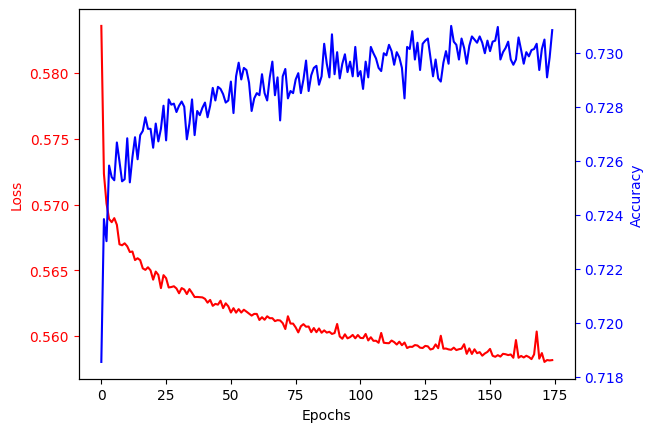

In [42]:
#plot the loss and accuracy for the TRAINING DATA
# Plotting the loss
fig, ax1 = plt.subplots()
ax1.plot(trainingSuccessDF2['loss'], color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
ax1.tick_params(axis='y', colors='red')

# Creating a twin axis for accuracy
ax2 = ax1.twinx()
ax2.plot(trainingSuccessDF2['accuracy'], color='blue')
ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', colors='blue')

# Display the plot
plt.show()

In [35]:
# Evaluate the model using the test data
model_loss2, model_accuracy2 = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

268/268 - 0s - loss: 0.6144 - accuracy: 0.7174 - 126ms/epoch - 469us/step
Loss: 0.6144407391548157, Accuracy: 0.7174014449119568


In [39]:
# Export our optimized model to a new HDF5 file
nn2.save("AlphabetSoupCharity_Optimization.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
